In [190]:
# Dependencies
import json
import pandas as pd
import numpy as np
import re

# Extract

In [191]:
# Read Wikipedia Data
wiki_file_directory = '../Data/Wikipedia/'
with open(f'{wiki_file_directory}wikipedia-movies.json',mode='r') as json_file:
    wiki_movies_raw = json.load(json_file)
len(wiki_movies_raw)

7311

In [192]:
wiki_movies_raw[3501:3502]

[{'url': 'https://en.wikipedia.org/wiki/The_Missing_(2003_film)',
  'year': 2003,
  'imdb_link': 'https://www.imdb.com/title/tt0338188/',
  'title': 'The Missing',
  'Directed by': 'Ron Howard',
  'Produced by': ['Brian Grazer', 'Ron Howard', 'Daniel Ostroff'],
  'Written by': 'Ken Kaufman',
  'Based on': ['The Last Ride', 'by', 'Thomas Eidson'],
  'Starring': ['Tommy Lee Jones',
   'Cate Blanchett',
   'Evan Rachel Wood',
   'Jenna Boyd',
   'Aaron Eckhart',
   'Val Kilmer'],
  'Music by': 'James Horner',
  'Cinematography': 'Salvatore Totino',
  'Edited by': ['Daniel P. Hanley', 'Mike Hill'],
  'Productioncompany ': ['Revolution Studios', 'Imagine Entertainment'],
  'Distributed by': 'Columbia Pictures',
  'Release date': ['November 26, 2003', '(', '2003-11-26', ')'],
  'Running time': '137 minutes',
  'Country': 'United States',
  'Language': ['English', 'Spanish', 'Apache'],
  'Budget': '$60 million',
  'Box office': '$38.4 million'}]

In [473]:
# Read Kaggle Data
kaggle_file_directory = '../Data/Kaggle/'
kaggle_meta_df = pd.read_csv(f'{kaggle_file_directory}movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv(f'{kaggle_file_directory}ratings.csv')

In [474]:
len(kaggle_meta_df), len(ratings_df)

(45466, 26024289)

In [424]:
kaggle_meta_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [425]:
kaggle_meta_df.sample(n=10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
18378,False,"{'id': 288235, 'name': 'Cat Run Collection', '...",25000000,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.catrunmovie.com/,57353,tt1446147,en,Cat Run,"When a sexy, high-end escort holds the key evi...",...,2011-04-01,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,CATch her if you can,Cat Run,False,6.0,45.0
17550,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,91208,tt0014497,en,Souls for Sale,"A young woman hits Hollywood, determined to be...",...,1923-04-22,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Souls for Sale,False,7.5,2.0
15323,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,132928,tt0032846,en,No Time for Comedy,Director William Keighley's 1940 film adaptati...,...,1940-09-14,0.0,98.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A country boy takes over Broadway . . . until ...,No Time for Comedy,False,6.0,2.0
12950,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",NaN,15822,tt0388727,da,Anklaget,On the surface Henrik and Nina Christofferson ...,...,2005-01-28,0.0,103.0,"[{'iso_639_1': 'da', 'name': 'Dansk'}]",Released,NaN,Accused,False,7.3,10.0
34006,False,NaN,0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,58207,tt0090455,en,If Tomorrow Comes,"This mini-series focuses on two people, Tracy ...",...,1986-03-16,0.0,313.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The excitement is in the chase,If Tomorrow Comes,False,6.5,6.0
21362,False,NaN,0,"[{'id': 28, 'name': 'Action'}]",NaN,58447,tt0181947,tr,3 dev adam,"Istanbul is being terrorized by a crime wave, ...",...,1973-01-01,0.0,81.0,"[{'iso_639_1': 'tr', 'name': 'Türkçe'}]",Released,NaN,Three Giant Men,False,7.0,1.0
8990,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,94666,tt0103010,en,Surviving Desire,"Jude, a college professor, is obsessed with So...",...,1992-01-22,0.0,53.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Surviving Desire,False,7.2,6.0
16485,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 14, 'nam...",NaN,74924,tt0056725,en,Zotz!,"Jonathan Jones, a professor of ancient languag...",...,1962-10-03,0.0,87.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Zay It, Zee It and Zoon!",Zotz!,False,6.5,2.0
11678,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,25062,tt0055506,en,A Taste of Honey,Focuses on a working class girl who is struggl...,...,1961-09-01,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,A Taste of Honey,False,6.5,21.0
6309,False,NaN,5000000,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",NaN,19728,tt0060177,en,The Blue Max,"A young pilot in the German air force of 1918,...",...,1966-06-21,0.0,156.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,There was no quiet on the Western Front!,The Blue Max,False,6.6,29.0


In [197]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [198]:
ratings_df.sample(n=10)

,userId,movieId,rating,timestamp
9373630,96841,6934,4.0,1285134232
6085855,62662,135,3.0,900357686
17867711,185470,597,3.0,845746709
8867155,91415,344,5.0,848056549
13206459,137251,94864,4.0,1460561922
3985136,41419,1201,4.0,943620321
15271052,158947,3033,4.0,1007969526
17658230,183133,1735,3.0,986257123
12841527,133282,8810,2.0,1448295563
10308220,106402,968,5.0,945024898


# Transform

In [199]:
# Transform Wikipedia Data
wiki_movies_raw_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_raw_df.head()

,url,year,imdb_link,title,Directed by,Produced by,Screenplay by,Story by,Based on,Starring,...,Predecessor,Founders,Area served,Products,Services,Russian,Hebrew,Revenue,Operating income,Polish
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990.0,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,Renny Harlin,"[Steve Perry, Joel Silver]","[David Arnott, James Cappe, Daniel Waters]","[David Arnott, James Cappe]","[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990.0,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet",James Foley,"[Ric Kidney, Robert Redlin]","[James Foley, Robert Redlin]",NaN,"[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990.0,https://www.imdb.com/title/tt0099005/,Air America,Roger Spottiswoode,Daniel Melnick,"[John Eskow, Richard Rush]",NaN,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990.0,https://www.imdb.com/title/tt0099012/,Alice,Woody Allen,Robert Greenhut,NaN,NaN,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990.0,https://www.imdb.com/title/tt0099018/,Almost an Angel,John Cornell,John Cornell,NaN,NaN,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
# Alter setting to display all rows
pd.set_option('display.max_rows', None)

In [201]:
wiki_movies_raw_df.columns.to_list()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [202]:
wiki_movies_raw_df.count()

url                       7153
year                      7153
imdb_link                 7100
title                     7134
Directed by               7103
Produced by               6740
Screenplay by             2324
Story by                  1005
Based on                  2199
Starring                  6920
Narrated by                285
Music by                  6503
Cinematography            6400
Edited by                 6398
Productioncompany         4540
Distributed by            6599
Release date              6914
Running time              6969
Country                   6726
Language                  6873
Budget                    4775
Box office                5530
Written by                4597
Genre                      129
Theme music composer        70
Country of origin          158
Original language(s)       164
Producer(s)                161
Editor(s)                  151
Production company(s)      136
Original network           131
Original release           165
Producti

## Wikipedia - JSON Cleanup

In [203]:
# Filter rows (list items)
wiki_movies = [i for i in wiki_movies_raw 
               if ('Director' in i or 'Directed by' in i) # based on Director
                   and 'imdb_link' in i # based on imdb_link
                   and 'No. of episodes' not in i # based on movie/TV show
              ] 
len(wiki_movies)

7076

In [204]:
# Merge alike columns (keys)
alt_langs = ['Also known as','Arabic','Cantonese','Chinese','French','Hangul','Hebrew','Hepburn','Japanese',
             'Literally','Mandarin','McCune–Reischauer','Original title','Polish','Revised Romanization','Romanized',
             'Russian','Simplified','Traditional','Yiddish']
clean_movies = []

def clean_movie(x):
    x = dict(x)
    
    # Consolidate Titles from all Languages
    alt_titles = {}
    for i in alt_langs:
        if i in x:
            alt_titles[i] = x[i]
            x.pop(i)
    if alt_titles:
        x['Alternate Title'] = alt_titles
    
    # Consolidate similar Columns
    def consolidate_columns(a,b):
        if a in x:
            x[b] = x.pop(a)
    consolidate_columns('Adaptation by', 'Writer(s)')
    consolidate_columns('Written by', 'Writer(s)')
    consolidate_columns('Screen story by', 'Writer(s)')
    consolidate_columns('Screenplay by', 'Writer(s)')
    consolidate_columns('Story by', 'Writer(s)')
    consolidate_columns('Country of origin', 'Country')
    consolidate_columns('Directed by', 'Director')
    consolidate_columns('Distributed by', 'Distributor')
    consolidate_columns('Edited by', 'Editor(s)')
    consolidate_columns('Length', 'Running time')
    consolidate_columns('Music by', 'Composer(s)')
    consolidate_columns('Theme music composer', 'Composer(s)')
    consolidate_columns('Produced by', 'Producer(s)')
    consolidate_columns('Producer', 'Producer(s)')
    consolidate_columns('Productioncompanies ', 'Production company(s)')
    consolidate_columns('Productioncompany ', 'Production company(s)')
    consolidate_columns('Original release', 'Release date')
    consolidate_columns('Released', 'Release date')
    consolidate_columns('Release Date', 'Release date')
    
    return x

for i in wiki_movies:
    clean_movies.append(clean_movie(i))

# Convert to DataFrame
wiki_movies_df = pd.DataFrame(clean_movies)
wiki_movies_df.head()

,url,year,imdb_link,title,Based on,Starring,Narrated by,Cinematography,Release date,Running time,...,Followed by,Created by,Preceded by,Suggested by,Alternate Title,Recorded,Venue,Label,Animation by,Color process
0,https://en.wikipedia.org/wiki/The_Adventures_o...,1990,https://www.imdb.com/title/tt0098987/,The Adventures of Ford Fairlane,"[Characters, by Rex Weiner]","[Andrew Dice Clay, Wayne Newton, Priscilla Pre...","Andrew ""Dice"" Clay",Oliver Wood,"[July 11, 1990, (, 1990-07-11, )]",102 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"https://en.wikipedia.org/wiki/After_Dark,_My_S...",1990,https://www.imdb.com/title/tt0098994/,"After Dark, My Sweet","[the novel, After Dark, My Sweet, by, Jim Thom...","[Jason Patric, Rachel Ward, Bruce Dern, George...",NaN,Mark Plummer,"[May 17, 1990, (, 1990-05-17, ), (Cannes Film ...",114 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://en.wikipedia.org/wiki/Air_America_(film),1990,https://www.imdb.com/title/tt0099005/,Air America,"[Air America, by, Christopher Robbins]","[Mel Gibson, Robert Downey Jr., Nancy Travis, ...",NaN,Roger Deakins,"[August 10, 1990, (, 1990-08-10, )]",113 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://en.wikipedia.org/wiki/Alice_(1990_film),1990,https://www.imdb.com/title/tt0099012/,Alice,NaN,"[Alec Baldwin, Blythe Danner, Judy Davis, Mia ...",NaN,Carlo Di Palma,"[December 25, 1990, (, 1990-12-25, )]",106 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://en.wikipedia.org/wiki/Almost_an_Angel,1990,https://www.imdb.com/title/tt0099018/,Almost an Angel,NaN,"[Paul Hogan, Elias Koteas, Linda Kozlowski]",NaN,Russell Boyd,"December 19, 1990",95 minutes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Wikipedia - DataFrame Cleanup

In [205]:
# IMDB ID
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})') # Extract IMDB ID
wiki_movies_df.drop_duplicates(subset='imdb_id',inplace=True) # Drop duplicate IMDB IDs
len(wiki_movies_df)

7033

In [206]:
# Check count of data in all columns
wiki_movies_df.count()

url                       7033
year                      7033
imdb_link                 7033
title                     7032
Based on                  2181
Starring                  6849
Narrated by                281
Cinematography            6342
Release date              7001
Running time              6894
Country                   6797
Language                  6789
Budget                    4738
Box office                5485
Writer(s)                 6834
Director                  7033
Distributor               6676
Editor(s)                 6485
Composer(s)               6515
Producer(s)               6831
Production company(s)     5355
Genre                      110
Original language(s)       158
Original network           125
Executive producer(s)       97
Production location(s)      47
Picture format              64
Audio format                61
Voices of                    2
Followed by                  9
Created by                  10
Preceded by                 10
Suggeste

In [207]:
# Keep only columns that have data in atleast 10% of the records
wiki_columns_to_keep = [i for i in wiki_movies_df if wiki_movies_df[i].count() >= (len(wiki_movies_df)*0.1)]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Budget                   4738
Box office               5485
Writer(s)                6834
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
imdb_id                  7033
dtype: int64

In [208]:
# Clean up Box Office column using Regular Expressions
box_office = wiki_movies_df['Box office'].dropna() 
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)
box_office

0                                           $21.4 million
1                                            $2.7 million
2                                             $57,718,089
3                                              $7,331,647
4                                        $6,939,946 (USA)
9                                                $855,810
10                                         $195.3 million
11                                          $53.2 million
12                                          $15.7 million
13                                          $52.1 million
14                                         $244.5 million
15                                            $12,626,043
17                                            $19,740,070
18                                           $138,697,012
20                                             $1,292,323
21                                           $8.2 million
22                                          $15.6 million
24            

In [209]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])','$', regex=True)
format_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
format_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)'
matches_one = box_office.str.contains(format_one, flags=re.IGNORECASE)
matches_two = box_office.str.contains(format_two, flags=re.IGNORECASE)
box_office[~matches_one & ~matches_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [210]:
box_office.str.extract(f'({format_one}|{format_two})')

,0
0,$21.4 million
1,$2.7 million
2,"$57,718,089"
3,"$7,331,647"
4,"$6,939,946"
9,"$855,810"
10,$195.3 million
11,$53.2 million
12,$15.7 million
13,$52.1 million


In [211]:
def parse_dollars(x):
    if type(x) != str:
        return np.nan
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on',x,flags=re.IGNORECASE):
        x = re.sub('\$|[a-zA-Z]|\s','',x)
        x = float(x) * 10**6
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on',x,flags=re.IGNORECASE):
        x = re.sub('\$|[a-zA-Z]|\s','',x)
        x = float(x) * 10**9
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illi?on)',x,flags=re.IGNORECASE):
        x = re.sub('\$|,','',x)
        x = float(x)
    else:
        return np.nan
    return x

In [212]:
wiki_movies_df['box_office'] = box_office.str.extract(f'({format_one}|{format_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df.drop('Box office', axis=1, inplace=True)
wiki_movies_df['box_office']

0       2.140000e+07
1       2.700000e+06
2       5.771809e+07
3       7.331647e+06
4       6.939946e+06
5                NaN
6                NaN
7                NaN
8                NaN
9       8.558100e+05
10      1.953000e+08
11      5.320000e+07
12      1.570000e+07
13      5.210000e+07
14      2.445000e+08
15      1.262604e+07
16               NaN
17      1.974007e+07
18      1.386970e+08
19               NaN
20      1.292323e+06
21      8.200000e+06
22      1.560000e+07
23               NaN
24      2.070871e+06
25      2.760000e+07
26               NaN
27      1.017300e+04
28               NaN
29      5.000000e+06
30               NaN
31               NaN
32               NaN
33      3.580000e+07
34      4.212828e+06
35               NaN
36               NaN
37      2.400000e+06
38               NaN
39      9.473060e+05
40      7.159830e+05
41               NaN
42      1.323651e+07
43      8.300000e+06
44      1.373728e+06
45      4.242000e+08
46               NaN
47      4.880

In [213]:
# Clean up Budget column using Regular Expressions
budget = wiki_movies_df['Budget'].dropna() # Copy non-null budget values into a series
budget = budget.apply(lambda x: ' '.join(x) if type(x) == list else x) # Convert lists into strings
budget = budget.str.replace(r'\[\d+\]\s*', '') # Remove square bracket values
budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True) # Handle ranges
format_one = r'\$\s*\d+\.?\d*\s*mill?i?on' # Format one
format_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\smillion)' # Format two
matches_one = budget.str.contains(format_one, flags=re.IGNORECASE) # Match format one 
matches_two = budget.str.contains(format_two, flags=re.IGNORECASE) # Match format two 
# budget[~matches_one & ~matches_two] # View unmatched values
wiki_movies_df['budget'] = budget.str.extract(f'({format_one}|{format_two})', flags=re.IGNORECASE)[0].apply(parse_dollars) # Extract the matched values and add series to Dataframe
wiki_movies_df.drop('Budget', axis=1, inplace=True) # Drop original Budget column
# wiki_movies_df['budget'] # View new Budget column
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Release date             7001
Running time             6894
Country                  6797
Language                 6789
Writer(s)                6834
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
imdb_id                  7033
box_office               5466
budget                   4706
dtype: int64

In [214]:
wiki_movies_df['Release date']

0                       [July 11, 1990, (, 1990-07-11, )]
1       [May 17, 1990, (, 1990-05-17, ), (Cannes Film ...
2                     [August 10, 1990, (, 1990-08-10, )]
3                   [December 25, 1990, (, 1990-12-25, )]
4                                       December 19, 1990
5                      [March 22, 1990, (, 1990-03-22, )]
6       [October 6, 1990, (, 1990-10-06, ), (, New Yor...
7                       [March 8, 1991, (, 1991-03-08, )]
8                       [March 7, 1990, (, 1990-03-07, )]
9                           [February 23, 1990 (, USA, )]
10                       [June 8, 1990, (, 1990-06-08, )]
11                      [July 18, 1990, (, 1990-07-18, )]
12      [October 5, 1990, (, 1990-10-05, ), (United St...
13      [December 20, 1990 (limited U.S.), January 11,...
14                       [May 25, 1990, (, 1990-05-25, )]
15                                          March 9, 1990
16                      [March 2, 1990, (, 1990-03-02, )]
17            

In [237]:
# Clean up Release Date column using Regular Expressions
release_date = wiki_movies_df['Release date'].dropna() # Copy non-null budget values into a series
release_date = release_date.apply(lambda x: ' '.join(x) if type(x) == list else x) # Convert lists into strings
month = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)'
format_one = month + r'\s\d{1,2}\,\s\d{4}' # 'Month (d)d, yyyy'
format_two = r'(?:\d{1,2}\s)?' + month + r' \d{4}' # 'dd Month yyyy' & 'Month yyyy''
format_three = '(' + month + ',\s\d{4})' # 'month, yyyy'
format_four = r'\d{4}.[01]\d.[0123]\d' # 'yyyy-(m)m-(d)d'
format_five = r'(^\d{4})' # 'yyyy'
# Extract the matched values in Date Time format and add series to Dataframe
wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({format_one}|{format_two}|{format_three}|{format_four}|{format_five})', flags=re.IGNORECASE)[0]) 
wiki_movies_df.drop('Release date', axis=1, inplace=True) # Drop original Budget column
wiki_movies_df.count()


url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Running time             6894
Country                  6797
Language                 6789
Writer(s)                6834
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
imdb_id                  7033
box_office               5466
budget                   4706
release_date             6998
dtype: int64

In [238]:
wiki_movies_df['release_date'].sample(n=10)

3993   2006-11-10
2558   1999-05-19
270    1991-09-29
1297   1995-04-21
6643   2016-04-17
1155   1995-11-05
5480   2012-01-20
6018   2013-10-09
853    1993-12-05
872    1994-03-23
Name: release_date, dtype: datetime64[ns]

In [420]:
# Clean up Running Time column using Regular Expressions
del run_time_extract
del run_time
run_time = wiki_movies_df['Running time'].dropna() # Copy non-null budget values into a series
run_time = run_time.apply(lambda x: ' '.join(x) if type(x) == list else x) # Convert lists into strings
format_one = r'(\d+)\s*ho?u?r?s?\s*(\d*)' # 'dd Month yyyy' & 'Month yyyy''
format_two = r'^(\d+)\s*m?' # 'x minutes'
run_time_extract = run_time.str.extract(f'({format_one}|{format_two})', flags=re.IGNORECASE)
run_time_extract = run_time_extract.apply(lambda x: pd.to_numeric(x,errors='coerce')).fillna(0)
wiki_movies_df['running_time'] = run_time_extract.apply(lambda x: x[1]*60+x[2] if x[2]!=0 else x[3], axis=1)
wiki_movies_df.drop('Running time', axis=1, inplace=True)
wiki_movies_df.count()

url                      7033
year                     7033
imdb_link                7033
title                    7032
Based on                 2181
Starring                 6849
Cinematography           6342
Country                  6797
Language                 6789
Writer(s)                6834
Director                 7033
Distributor              6676
Editor(s)                6485
Composer(s)              6515
Producer(s)              6831
Production company(s)    5355
imdb_id                  7033
box_office               5466
budget                   4706
release_date             6998
running_time             6894
dtype: int64

In [421]:
wiki_movies_df.sample(n=10)

,url,year,imdb_link,title,Based on,Starring,Cinematography,Country,Language,Writer(s),...,Distributor,Editor(s),Composer(s),Producer(s),Production company(s),imdb_id,box_office,budget,release_date,running_time
861,https://en.wikipedia.org/wiki/What%27s_Love_Go...,1993,https://www.imdb.com/title/tt0108551/,What's Love Got to Do with It,"[I, Tina, by, Tina Turner, Kurt Loder]","[Angela Bassett, Laurence Fishburne]",NaN,United States,English,Kate Lanier,...,"Buena Vista Pictures Distribution, Inc.",NaN,Stanley Clarke,"[Doug Chapin, Barry Krost]",Touchstone Pictures,tt0108551,39100000.0,15000000.0,1993-06-06,118.0
5639,https://en.wikipedia.org/wiki/Marley_(film),2012,https://www.imdb.com/title/tt1183919/,Marley,NaN,Bob Marley,"[Mike Eley, Alwin H. Küchler, Wally Pfister]","[United States, United Kingdom, Jamaica]","[English, Jamaican Patois, French]",NaN,...,"[Magnolia Pictures, (US), Universal Pictures, ...",Dan Glendenning,NaN,Charles Steele,"[Shangri-La Entertainment, Tuff Gong Pictures,...",tt1183919,1412124.0,NaN,2012-02-12,145.0
198,https://en.wikipedia.org/wiki/Rocky_V,1990,https://www.imdb.com/title/tt0100507/,Rocky V,"[Characters, by Sylvester Stallone]","[Sylvester Stallone, Talia Shire, Burt Young, ...",Steven Poster,United States,English,Sylvester Stallone,...,MGM/UA Communications Company,"[John G. Avildsen, Michael N. Knue, Robert A. ...",Bill Conti,"[Irwin Winkler, Robert Chartoff]",United Artists,tt0100507,119900000.0,42000000.0,1990-11-16,104.0
4137,https://en.wikipedia.org/wiki/Little_Chenier,2006,https://www.imdb.com/title/tt0758764/,Little Chenier: A Cajun Story,NaN,"[Johnathon Schaech, Frederick Koehler, Tamara ...",NaN,United States,English,"[Bethany Ashton, Jace Johnson]",...,Radio London Films,Brian Anton,Michael Picton,"[Clifton Collins Jr., Jane Dennison, Jessica S...",NaN,tt0758764,87939.0,6000000.0,2006-10-20,120.0
6330,https://en.wikipedia.org/wiki/Da_Sweet_Blood_o...,2015,https://www.imdb.com/title/tt3104930/,Da Sweet Blood of Jesus,NaN,"[Stephen Tyrone Williams, Rami Malek, Zaraah A...",Daniel Patterson,United States,English,"[Spike Lee, Bill Gunn]",...,Gravitas Ventures,Randy Wilkins,Bruce Hornsby,"[Spike Lee, Chiz Schultz]",40 Acres and a Mule Filmworks,tt3104930,NaN,1400000.0,2014-06-22,123.0
2112,https://en.wikipedia.org/wiki/Wild_America_(film),1997,https://www.imdb.com/title/tt0120512/,Wild America,NaN,"[Jonathan Taylor Thomas, Devon Sawa, Scott Bai...",David Burr,United States,English,David Michael Wieger,...,Warner Bros.,O. Nicholas Brown,Joel McNeely,"[Gary Barber, James G. Robinson, Irby Smith, M...",Morgan Creek Productions,tt0120512,7300000.0,46000000.0,1997-07-02,106.0
5967,https://en.wikipedia.org/wiki/Mud_(2012_film),2013,https://www.imdb.com/title/tt1935179/,Mud,NaN,"[Matthew McConaughey, Tye Sheridan, Jacob Lofl...",Adam Stone,United States,English,Jeff Nichols,...,"[Lionsgate, Roadside Attractions]",Julie Monroe,David Wingo,"[Lisa Maria Falcone, Sarah Green, Aaron Ryder]","[Everest Entertainment, Brace Cove Productions...",tt1935179,32600000.0,10000000.0,2012-05-26,130.0
5496,https://en.wikipedia.org/wiki/Border_Run,2012,https://www.imdb.com/title/tt2069955/,Border Run,NaN,"[Sharon Stone, Billy Zane, Miguel Rodarte, Olg...",Andrew Strahorn,United States,English,"[Don Fiebiger, and, Amy Kolquist]",...,"[Kalinos Filmcilik, Polarstar Films, SND Group...",James Coblentz,"[Emilio Kauderer, Sebastián Kauderer, Marco We...",Lucas Jarach,Voltage Pictures,tt2069955,NaN,NaN,2012-11-26,NaN
4160,https://en.wikipedia.org/wiki/Mini%27s_First_Time,2006,https://www.imdb.com/title/tt0425253/,Mini's First Time,NaN,"[Alec Baldwin, Nikki Reed, Luke Wilson, Carrie...",NaN,NaN,English,Nick Guthe,...,"[Bold Films, HBO Films]",NaN,Cato,"[Kevin Spacey, Dana Brunetti, Evan Astrowsky, ...",NaN,tt0425253,NaN,NaN,2006-07-14,91.0
1831,https://en.wikipedia.org/wiki/Boys_Life_2,1997,https://www.imdb.com/title/tt0118762/,Boys Life 2,NaN,"[Milo Ventimiglia, Vincent D'Onofrio, Mary Bet...",NaN,United States,English,N

## Kaggle Data Cleanup

In [475]:
kaggle_meta_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [476]:
kaggle_meta_df.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [477]:
kaggle_meta_df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [478]:
kaggle_meta_df[~kaggle_meta_df['adult'].isin(['True','False'])]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [480]:
kaggle_meta_df = kaggle_meta_df.loc[kaggle_meta_df['adult'] == 'False'].drop(['adult'],axis=1)

In [481]:
kaggle_meta_df.count()

belongs_to_collection     4491
budget                   45454
genres                   45454
homepage                  7777
id                       45454
imdb_id                  45437
original_language        45443
original_title           45454
overview                 44500
popularity               45451
poster_path              45068
production_companies     45451
production_countries     45451
release_date             45368
revenue                  45451
runtime                  45194
spoken_languages         45451
status                   45370
tagline                  20406
title                    45451
video                    45451
vote_average             45451
vote_count               45451
dtype: int64

In [482]:
kaggle_meta_df['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [483]:
kaggle_meta_df['video'] = kaggle_meta_df['video'] == True

In [484]:
kaggle_meta_df['video'].dtypes

dtype('bool')

In [485]:
kaggle_meta_df['budget'] = kaggle_meta_df['budget'].astype(int)
kaggle_meta_df['id'] = pd.to_numeric(kaggle_meta_df['id'], errors='raise')
kaggle_meta_df['popularity'] = pd.to_numeric(kaggle_meta_df['popularity'], errors='raise')

In [490]:
kaggle_meta_df[['budget','id','popularity']].dtypes

budget          int64
id              int64
popularity    float64
dtype: object

In [491]:
kaggle_meta_df['release_date'] = pd.to_datetime(kaggle_meta_df['release_date'])
kaggle_meta_df['release_date'].dtypes

dtype('<M8[ns]')

In [492]:
kaggle_meta_df.dtypes

belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object

In [500]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [499]:
ratings_df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [501]:
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'],unit='s')

In [503]:
ratings_df['timestamp'].sample(n=10)

5745314    2013-02-10 02:08:03
10122868   1996-11-07 18:02:28
18619902   2006-12-17 06:06:16
7359213    2014-09-02 21:03:31
17220733   2008-11-12 04:12:13
23769574   2015-07-03 12:00:52
2875431    2013-04-14 18:05:18
14442135   2006-10-15 06:53:55
10733458   2007-12-28 18:17:31
2645110    2016-09-23 07:10:10
Name: timestamp, dtype: datetime64[ns]

In [507]:
ratings_df['rating'].describe()

count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<AxesSubplot:ylabel='Frequency'>

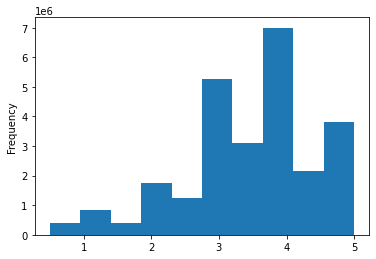

In [508]:
ratings_df['rating'].plot(kind='hist')